# Goal: Running a CAPM estimation

## Hey, Python techies!!

In this video, we will see how to estimate the CAPM model. The CAPM postulates a linear relationship between the expected excess return of a single stock and the market-wide equity risk premium:

$$E[r_A] - r_f = \beta_A (E[r_M] - r_f).$$

Given time series observations of stock returns, the returns of a broad stock index and the riskfree rate, we can estimate the $\beta_A$ parameter via the following linear regression:

$$r_{t,A} - r_{t,f} = \alpha_A + \beta_A (r_{t,M} - r_{t,f}) + \epsilon_{t,A}.$$

The $t$ index now indicates the point of time of a certain return observation and $\alpha_A$ is added to capture any potential biases from the postulated linear relationship.

In the following, we will estimate the CAPM for the stock of Microsoft.

## So, let's jump into the code

We start by importing the usual packages. In addition, we import the 'statsmodels' package in code line 3 to run the linear regression later on.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

We read in the data from a csv file in code line 5 and calculate simple returns as $r_t = \frac{S_t - S_{t-1}}{S_{t-1}}$ in code lines 6 and 7.

In [2]:
data = pd.read_csv('data.csv', parse_dates = ['Date'])

data['MSFT_Ret'] = (data['Close_msft'] - data['Close_msft'].shift(1)) / data['Close_msft'].shift(1)
data['SP500_Ret'] = (data['Close_sp500'] - data['Close_sp500'].shift(1)) / data['Close_sp500'].shift(1)

We use T-Bill rates as a proxy for the riskfree rate. They are given in yearly percentage terms, so we need to scale them appropriately. We translate them from precentage figures to actual numbers by dividing the given rates by 100 and scale them to the daily horizon by dividing further by the number of trading days in a year.

In [3]:
data['Tbill_daily'] = data['Close_tbill'] / (100 * 252)
data.head()

,Date,Close_sp500,Close_tbill,Close_msft,MSFT_Ret,SP500_Ret,Tbill_daily
0,1993-11-01,469.10,3.06,2.52,NaN,NaN,0.000121
1,1993-11-02,468.44,3.12,2.50,-0.007937,-0.001407,0.000124
2,1993-11-03,463.02,3.08,2.45,-0.020000,-0.011570,0.000122
3,1993-11-04,457.49,3.07,2.38,-0.028571,-0.011943,0.000122
4,1993-11-05,459.57,3.07,2.45,0.029412,0.004547,0.000122


After the return calculation, the very first returns are NaN. This is because we do not know the price before the first price in our data sample. We drop all rows with NaN values in code line 10. This way, the NaNs will not cause problems in the further calculations.

In [4]:
data = data.dropna()
data.head()

,Date,Close_sp500,Close_tbill,Close_msft,MSFT_Ret,SP500_Ret,Tbill_daily
1,1993-11-02,468.44,3.12,2.50,-0.007937,-0.001407,0.000124
2,1993-11-03,463.02,3.08,2.45,-0.020000,-0.011570,0.000122
3,1993-11-04,457.49,3.07,2.38,-0.028571,-0.011943,0.000122
4,1993-11-05,459.57,3.07,2.45,0.029412,0.004547,0.000122
5,1993-11-08,460.21,3.06,2.45,0.000000,0.001393,0.000121


Next, we calculate excess returns for Microsoft and the S&P 500 in code lines 12 and 13.

In [6]:
data['MSFT_Ex_Ret'] = data['MSFT_Ret'] - data['Tbill_daily']
data['SP500_Ex_Ret'] = data['SP500_Ret'] - data['Tbill_daily']

We now estimate the linear CAPM relationship using OLS. Printing the result summary gives us the estimate for Microsoft's beta coefficient, which is 1.248. 

In [7]:
Y = data['MSFT_Ex_Ret'].values
X = data['SP500_Ex_Ret'].values
X = sm.add_constant(X)
model = sm.OLS(Y, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1241.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          7.87e-219
Time:                        15:21:48   Log-Likelihood:                 5902.4
No. Observations:                2362   AIC:                        -1.180e+04
Df Residuals:                    2360   BIC:                        -1.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.234      0.0

The parameter estimates of the OLS estimation can also be accessed via the 'params' attribute of the OLS result object.

In [14]:
model_fit.params

array([9.14284709e-04, 1.24797878e+00])

We end this demonstration with a graphical representation of the CAPM. The following code plots all return observations in a scatter plot and adds the estimated linear CAPM relationship. 

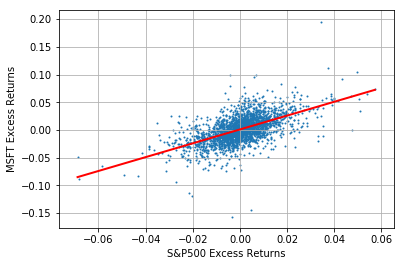

In [20]:
plt.figure(6)
plt.scatter(data['SP500_Ex_Ret'], data['MSFT_Ex_Ret'], s = 1)
x = np.linspace(data['SP500_Ex_Ret'].min(), data['SP500_Ex_Ret'].max())
plt.plot(x, model_fit.params[0] + model_fit.params[1] * x, 'r', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P500 Excess Returns')
plt.ylabel('MSFT Excess Returns')
plt.show()